In [ ]:
!pip install shap

In [ ]:
 # Install the scikeras library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

## **importing dataset**

### **Connecting to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset= '/content/drive/MyDrive/MalGAN/Datasets'


In [ ]:
import os
print(os.listdir(dataset))

['8_family_training.csv', '8_family_testing.csv', '8_family_validation.csv']


### **Loading Data**

In [ ]:
# Paths to the datasets
train_path = os.path.join(dataset, '8_family_training.csv')
test_path = os.path.join(dataset, '8_family_testing.csv')




In [ ]:
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

In [ ]:
data_train.head()

,Malware,Executable_name,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,Benign,Benign_3071,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Benign,Benign_2017,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,qbot,backdoor_qbot_2020_124,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,emotet,spyware_emotet_2019_223,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Benign,Benign_2048,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count=data_train['Malware'].value_counts()
print(count)

Malware
Benign    1019
qbot       509
fareit     486
shade      310
emotet     298
ursnif     254
gozi       158
banbra     150
tofsee     105
Name: count, dtype: int64


In [ ]:
count_test=data_test['Malware'].value_counts()
print(count_test)

Malware
Benign    127
qbot       64
fareit     60
shade      39
emotet     37
ursnif     31
gozi       20
banbra     18
tofsee     13
Name: count, dtype: int64


In [ ]:
X_train=data_train.drop(['Malware','Executable_name'],axis=1)
y_trian=data_train['Malware']

In [ ]:
X_test=data_test.drop(['Malware','Executable_name'],axis=1)
y_test=data_test['Malware']

In [ ]:
print(X_train.shape);
print(X_test.shape);

(3289, 6005)
(409, 6005)


In [ ]:
X_train.head()

,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,NtFreeVirtualMemory,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,1030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

lable = LabelEncoder()


for i in X_train.columns:
  if X_train[i].dtype == 'object':
    X_train[i] = lable.fit_transform(X_train[i])

In [ ]:
X_train.head()

,NtSetInformationProcess,NtAllocateVirtualMemory,NtProtectVirtualMemory,NtOpenFile,NtQueryInformationProcess,NtOpenKey,NtQueryValueKey,NtClose,NtQuerySystemInformation,NtFreeVirtualMemory,...,1042.dll,1041.dll,1049.dll,1040.dll,1036.dll,3082.dll,1031.dll,1028.dll,2052.dll,rtinfo.dll
0,0.0,13.0,11.0,6.0,13.0,3.0,9.0,32.0,11.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,179.0,780.0,729.0,93.0,355.0,63.0,1334.0,1755.0,89.0,1030.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,400.0,482.0,104.0,286.0,31.0,412.0,1081.0,120.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,146.0,197.0,71.0,116.0,223.0,467.0,77942.0,61.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,37.0,6.0,7.0,7.0,4.0,29.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature_names = list(X_train.columns)

In [ ]:

for j in X_test.columns:
  if X_test[j].dtype == 'object':
    X_test[j] = lable.fit_transform(X_test[j])

In [ ]:
y_train=lable.fit_transform(y_trian)
y_test=lable.fit_transform(y_test)

In [ ]:
label_mapping_train = dict(zip(range(len(lable.classes_)), lable.classes_))


# Display the mapping
print("Label Mapping:", label_mapping_train)

Label Mapping: {0: 'Benign', 1: 'banbra', 2: 'emotet', 3: 'fareit', 4: 'gozi', 5: 'qbot', 6: 'shade', 7: 'tofsee', 8: 'ursnif'}


In [ ]:
class_name=['Benign', 'banbra', 'emotet', 'fareit', 'gozi', 'qbot', 'shade', 'tofsee', 'ursnif']

In [ ]:
stdScale=StandardScaler()
X_train=stdScale.fit_transform(X_train)
X_test=stdScale.fit_transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## **1DCNN**

In [ ]:
CNN_model = load_model('/content/drive/MyDrive/MalGAN/model.keras')

In [ ]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 6003, 80)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3001, 80)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2999, 64)            │          15,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1499, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 95936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 95936)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,279,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,593,684 (93.82 MB)

 Trainable params: 12,296,841 (46.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,296,843 (46.91 MB)

# **SHAP**

In [ ]:
import shap

In [ ]:
sample_test=X_test

In [ ]:
type(sample_test)

numpy.ndarray

In [ ]:
background = X_train[:100]  # A representative subset of your training data
explainer = shap.DeepExplainer(CNN_model, background)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
sample_test.shape

(409, 6005, 1)

In [ ]:
shap_values = explainer.shap_values(sample_test)

In [ ]:
shap_values.shape

(409, 6005, 1, 9)

### **For class =0**

In [ ]:
class_index = 0  # Change this index to target a specific class
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)


In [ ]:
X_test.shape

(409, 6005, 1)

In [ ]:
sample=X_test

In [ ]:
sample.shape


(409, 6005, 1)

In [ ]:
sample_test_2d = sample.reshape(409, 6005)

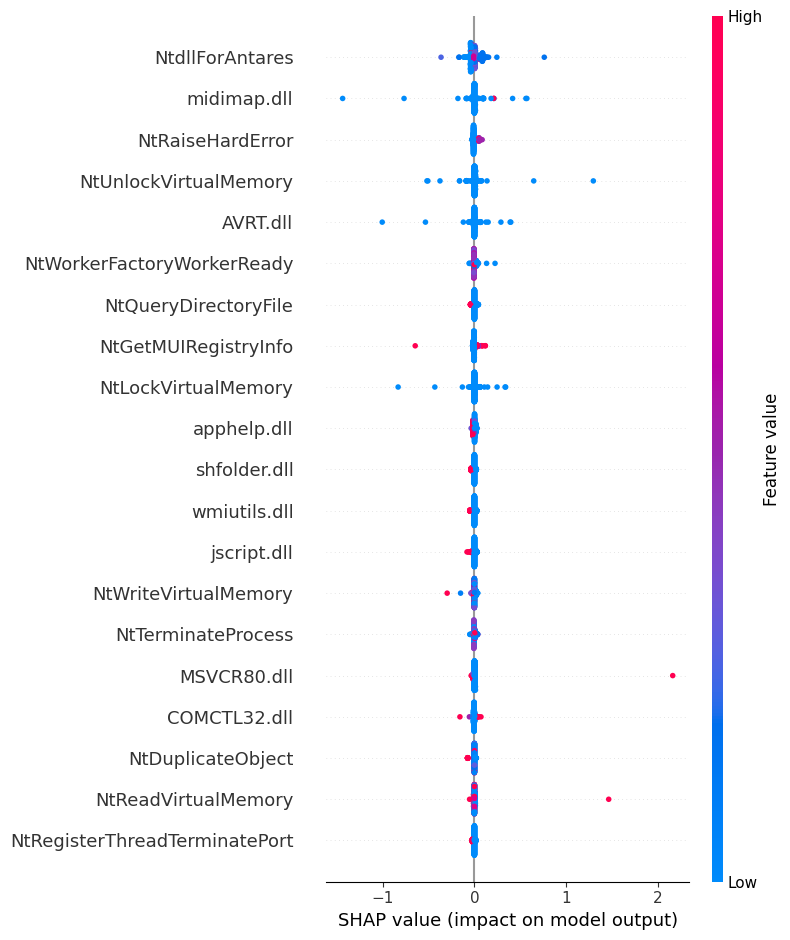

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

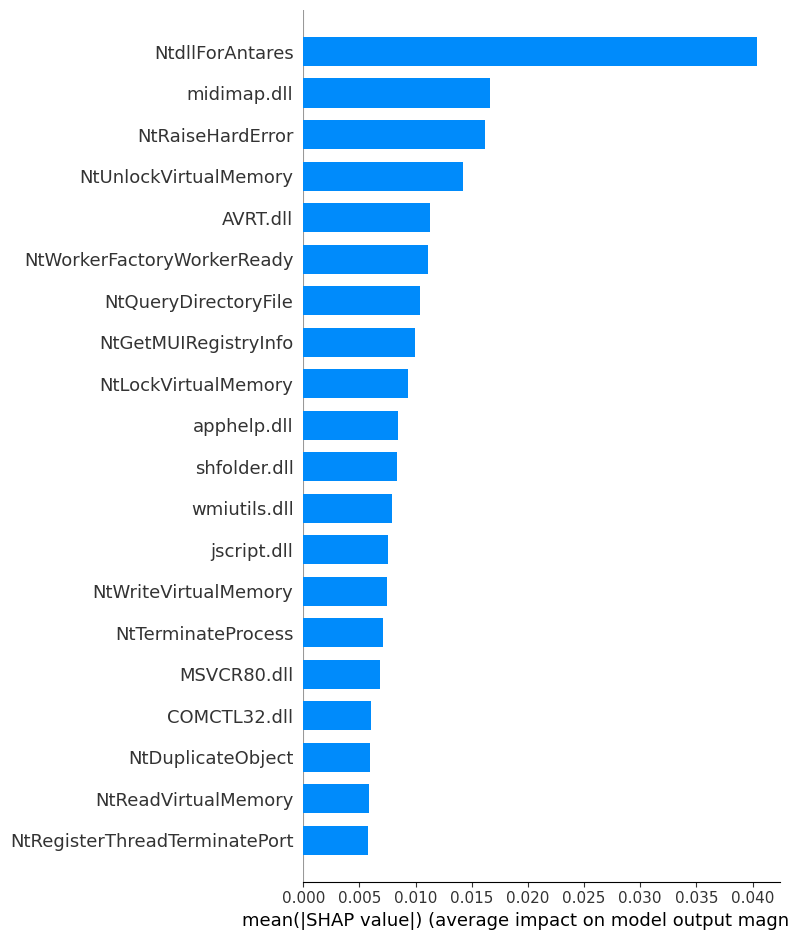

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

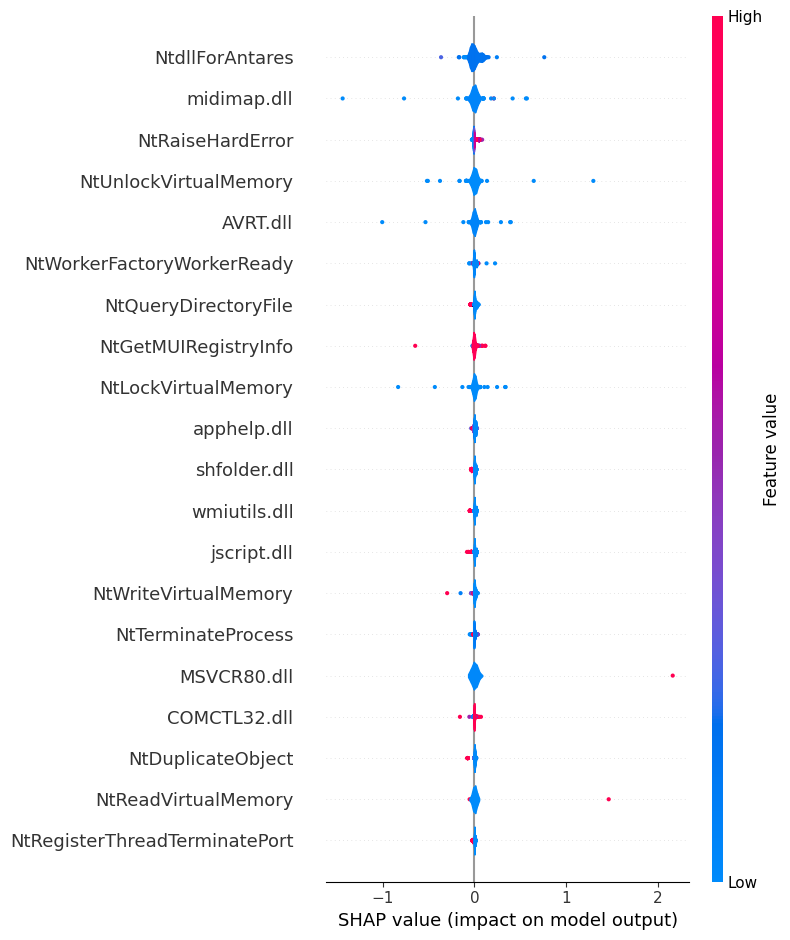

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **class=1**

In [ ]:
class_index = 1
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)


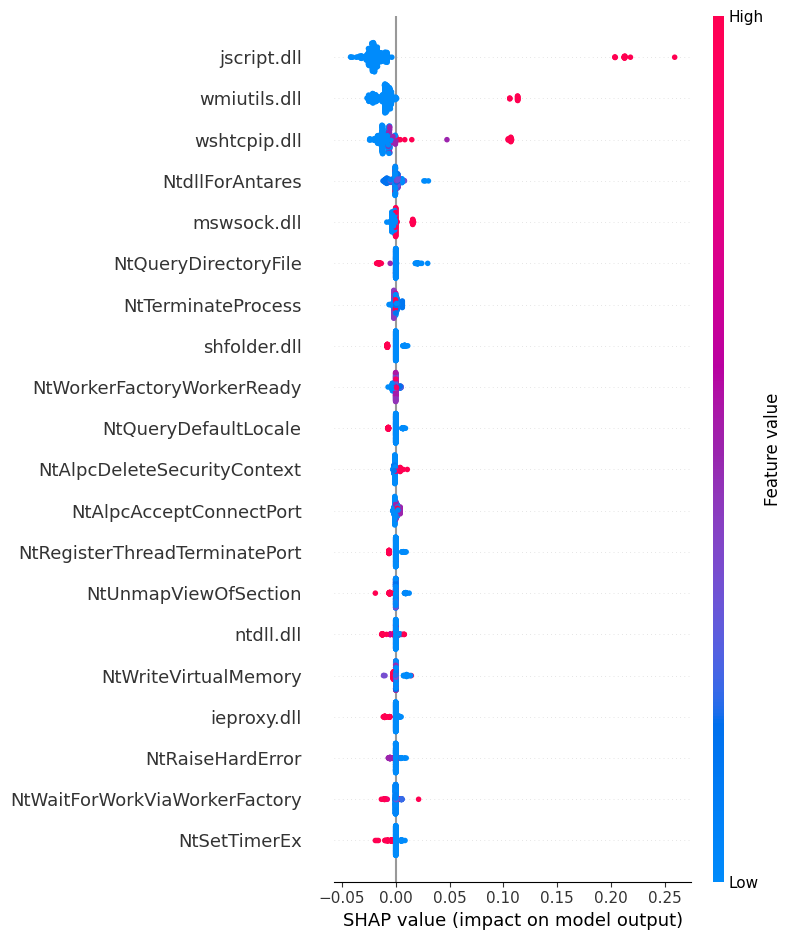

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

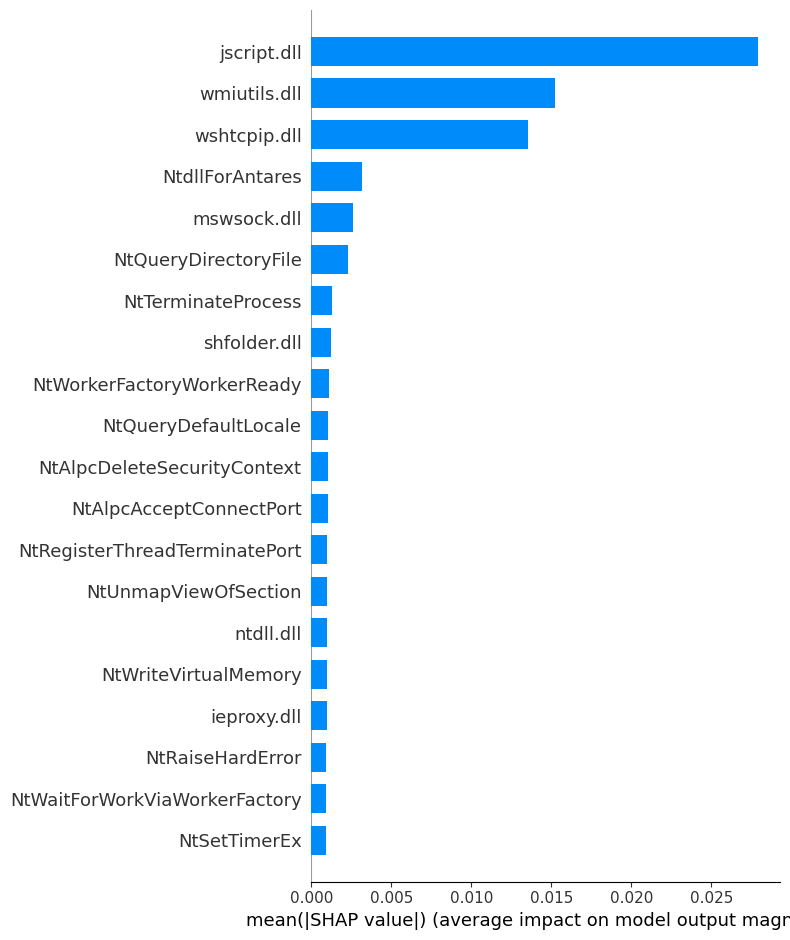

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

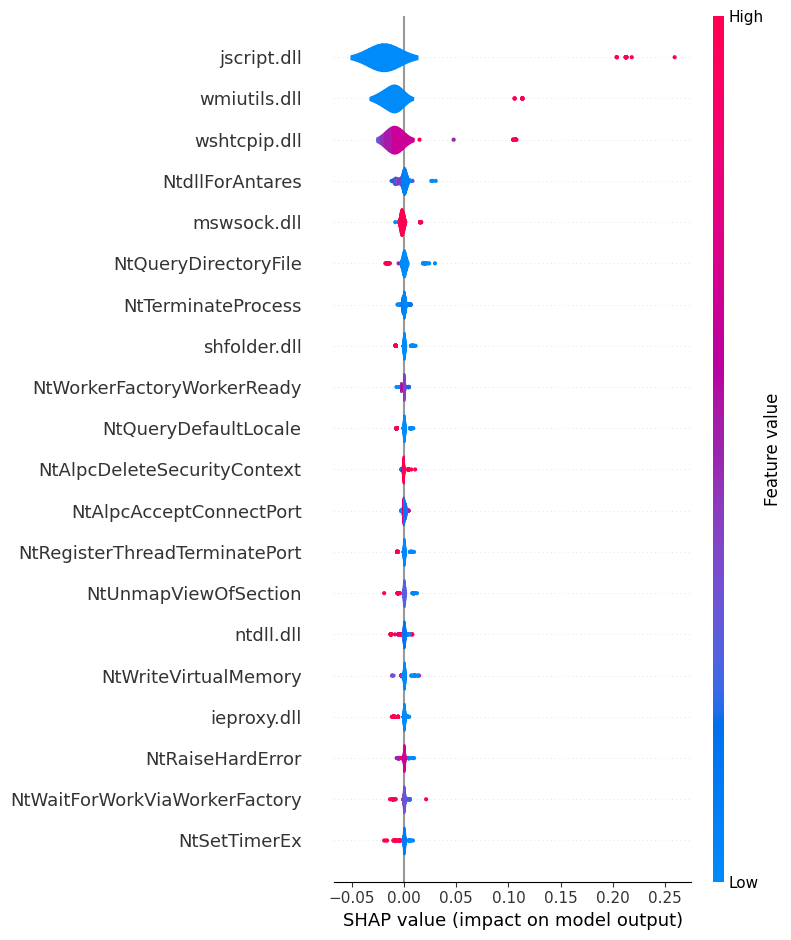

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **class=2**

In [ ]:
class_index = 2
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)

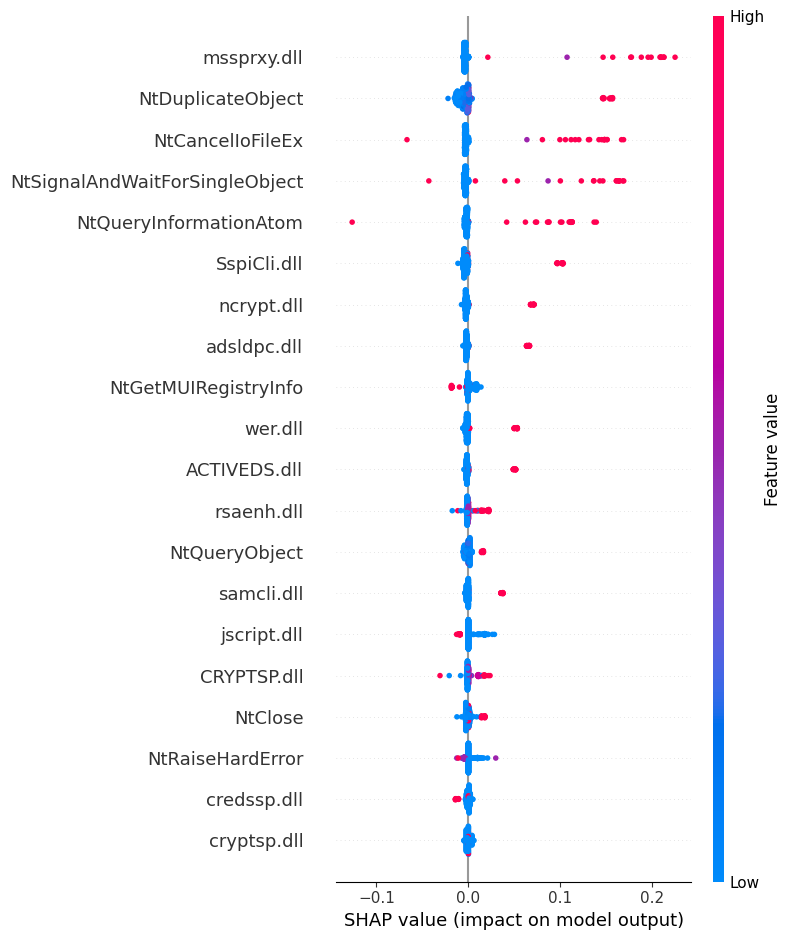

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

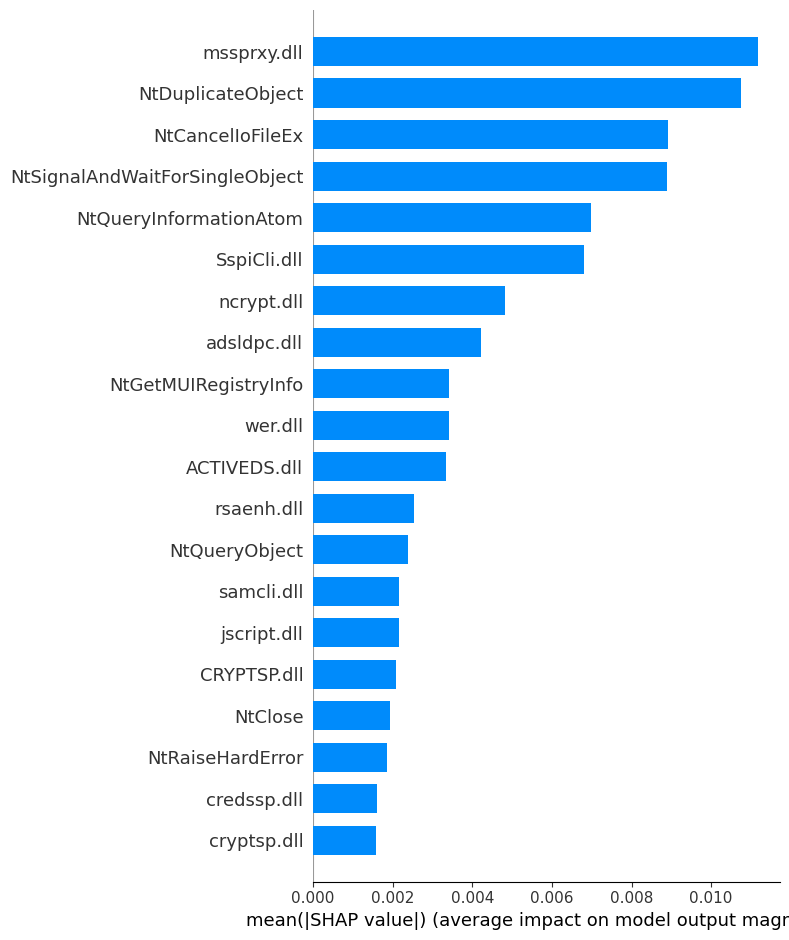

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

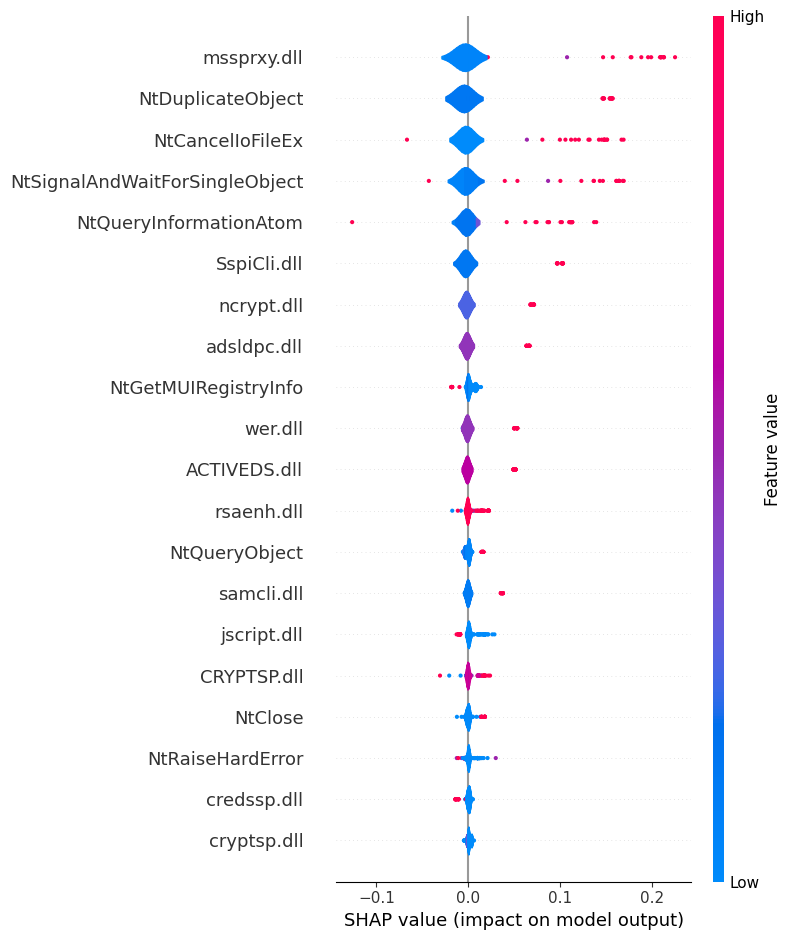

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **Class = 3**

In [ ]:
class_index = 3
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)

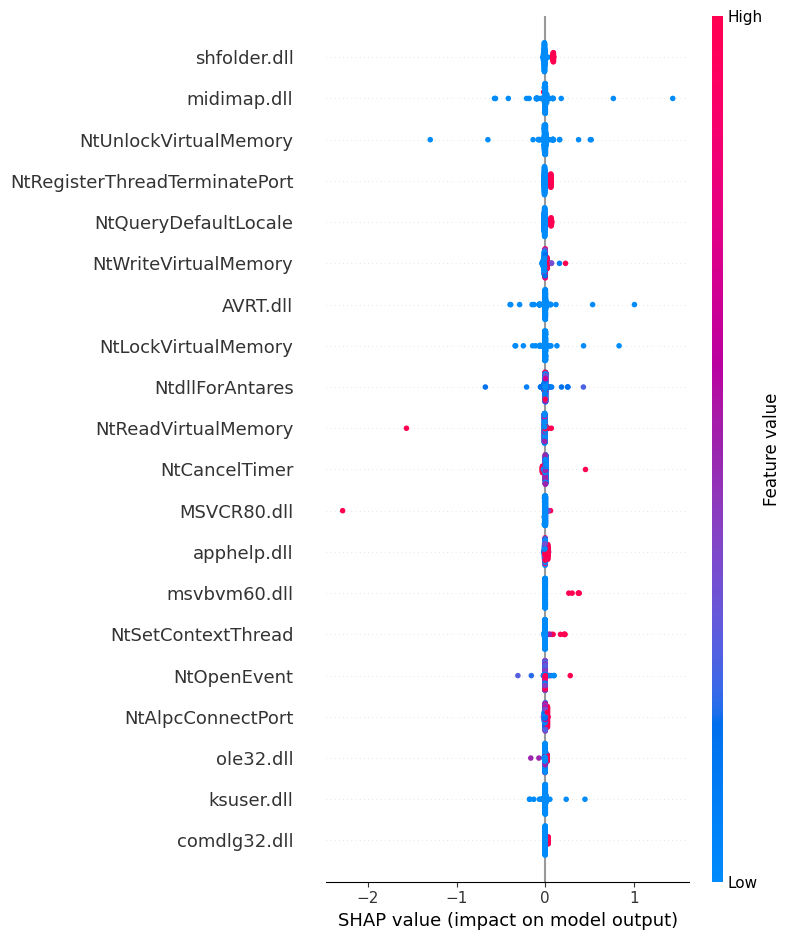

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

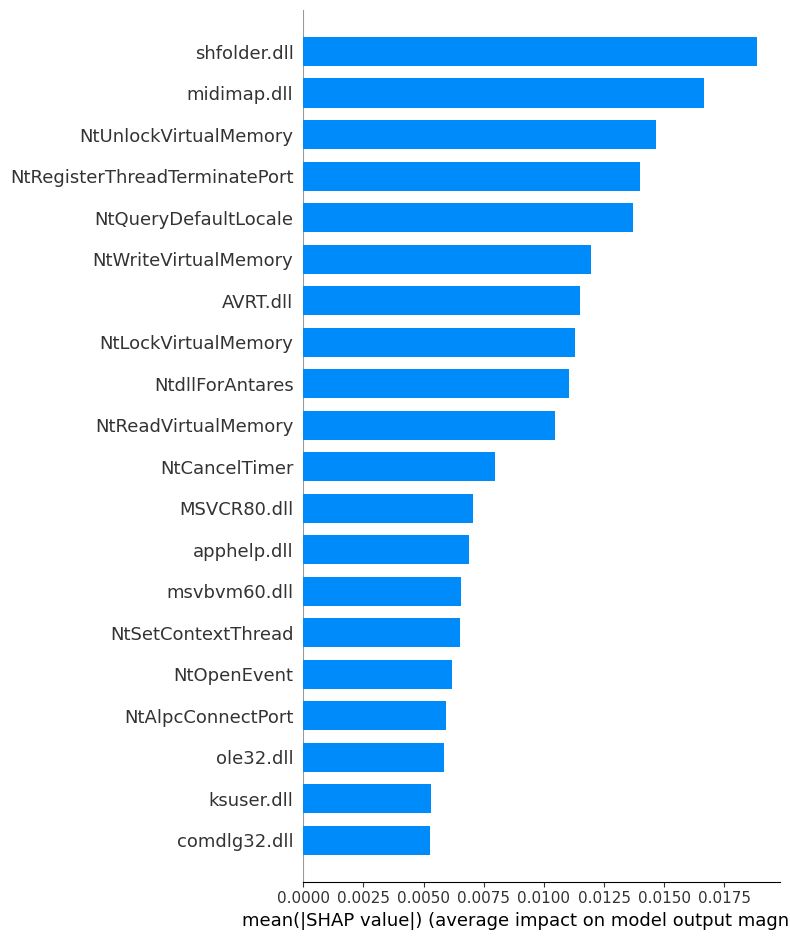

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

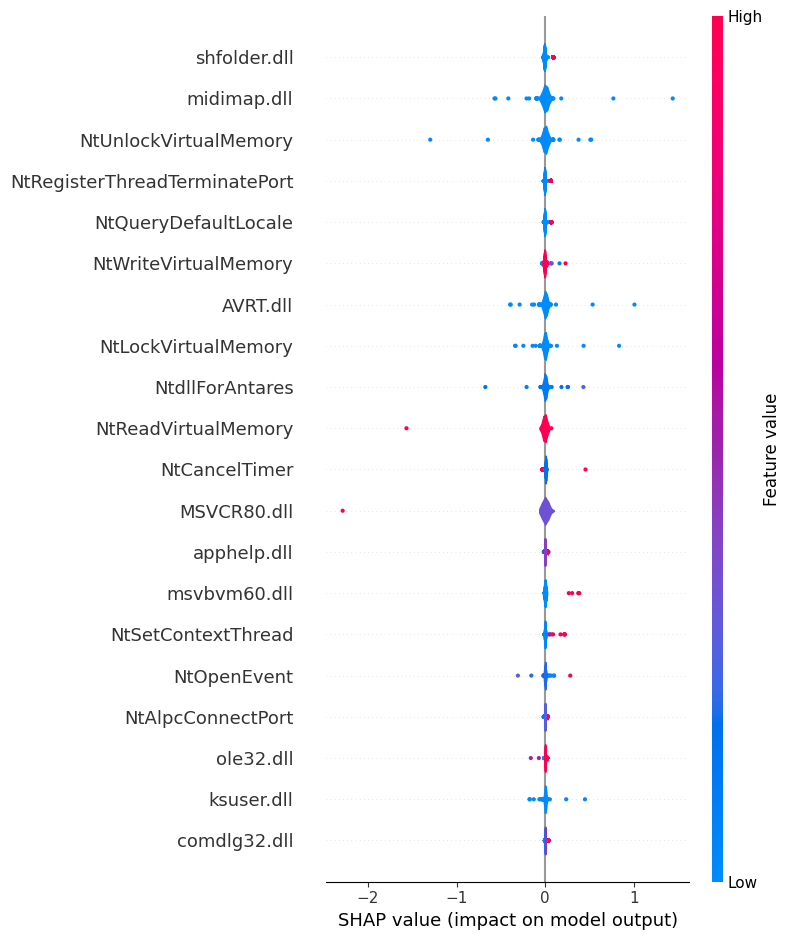

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **Class = 4**

In [ ]:
class_index = 4
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)

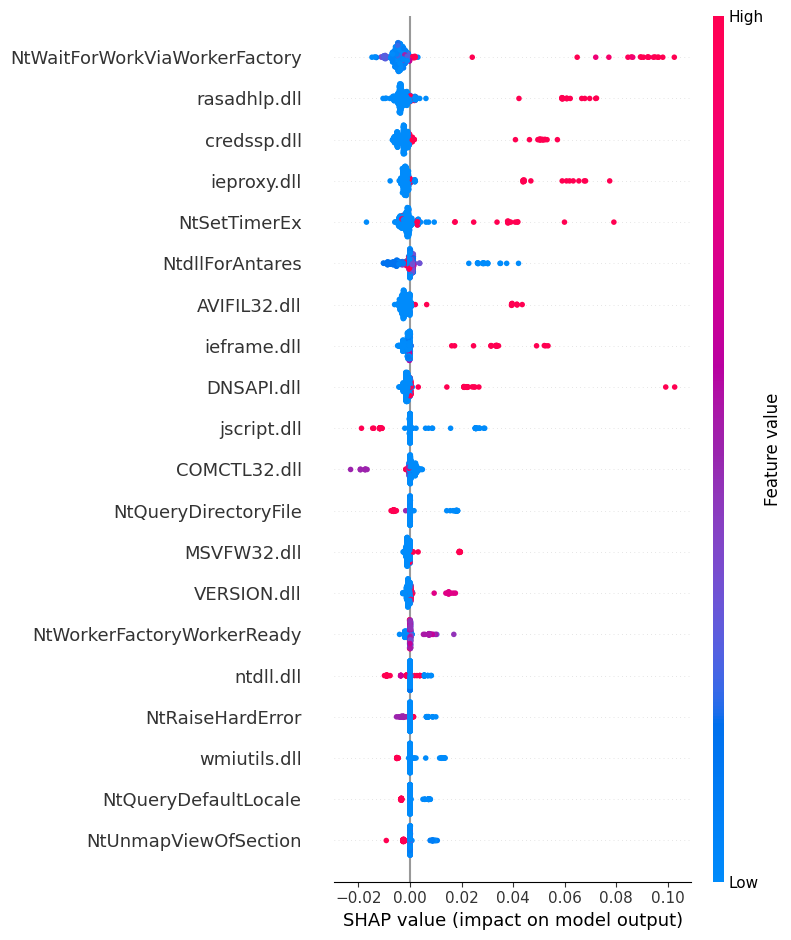

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

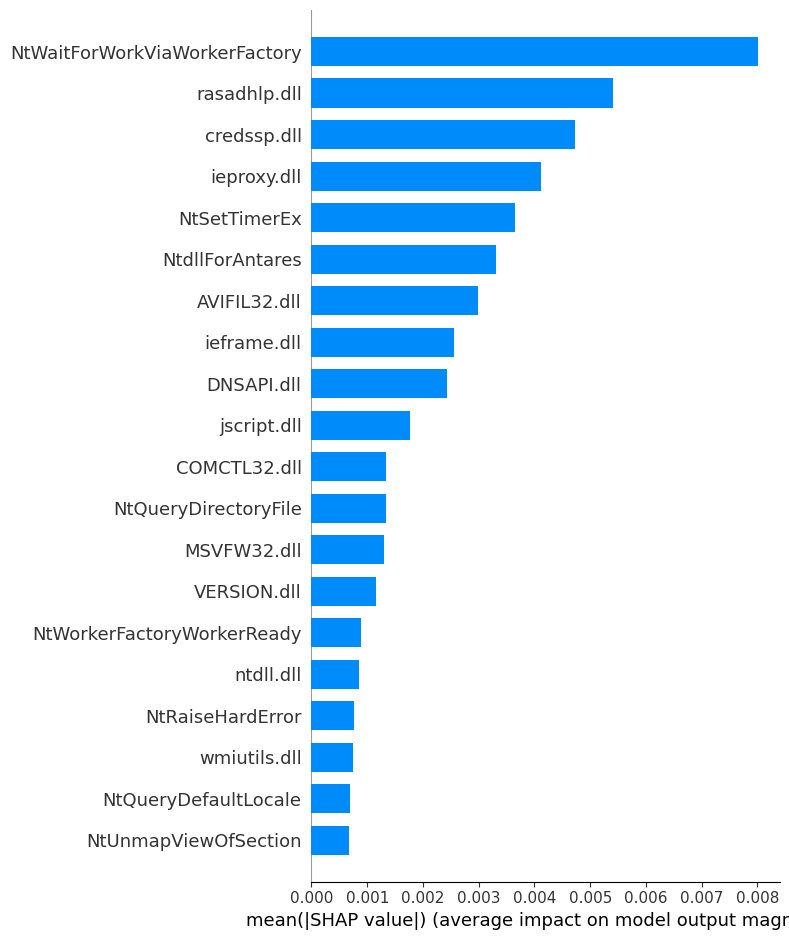

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

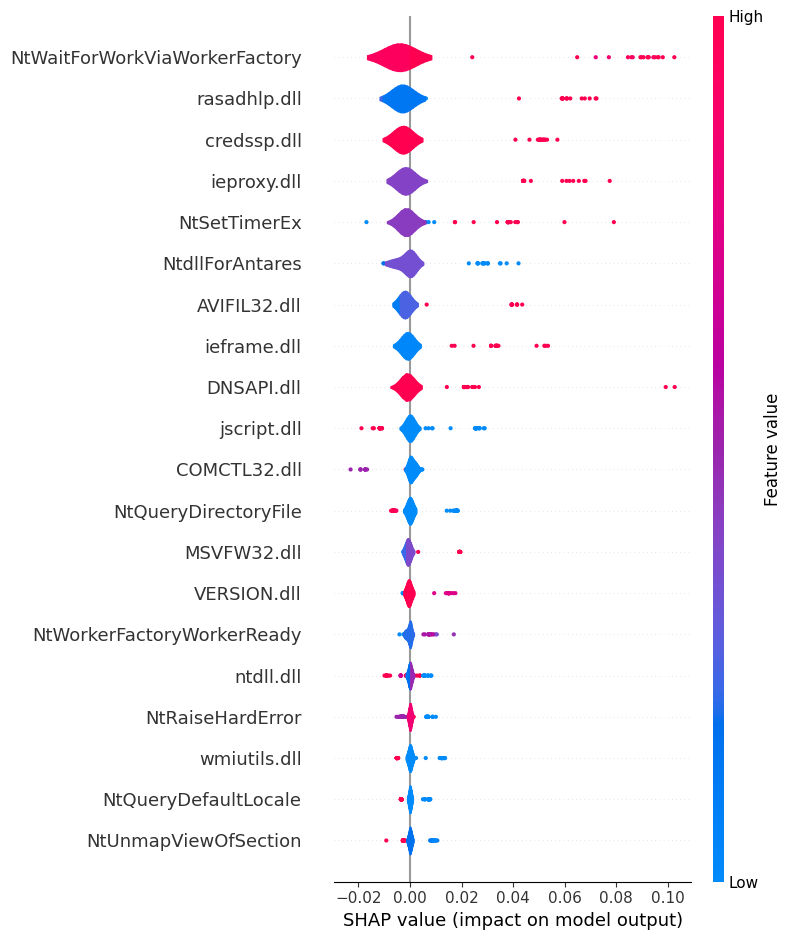

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **Class = 5**

In [ ]:
class_index = 5
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)

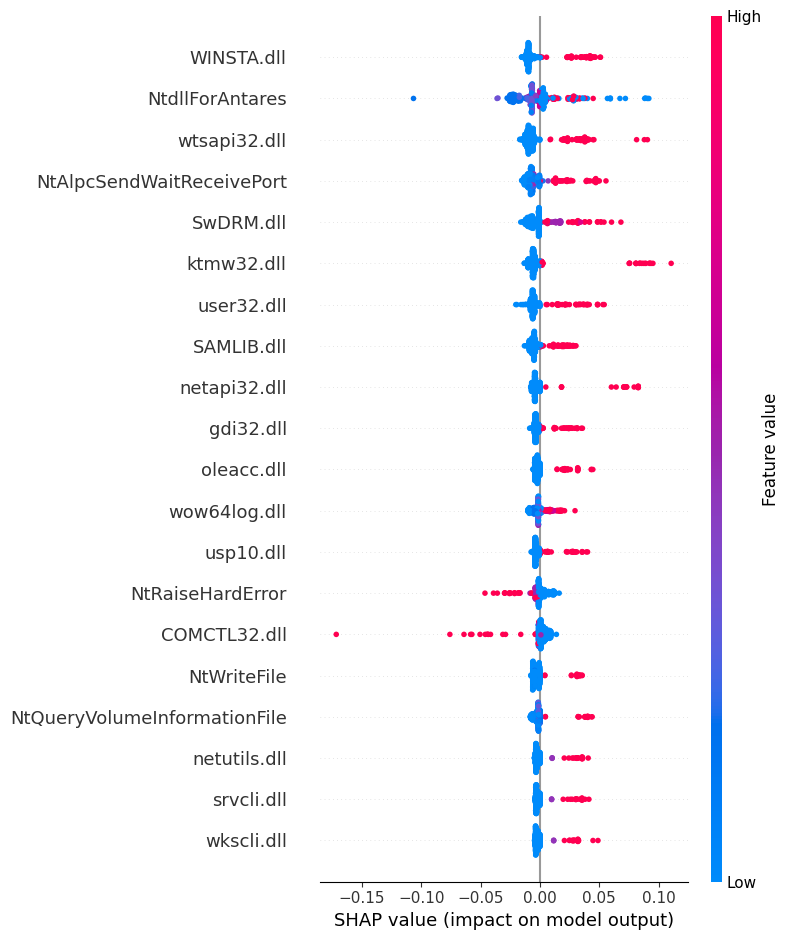

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)


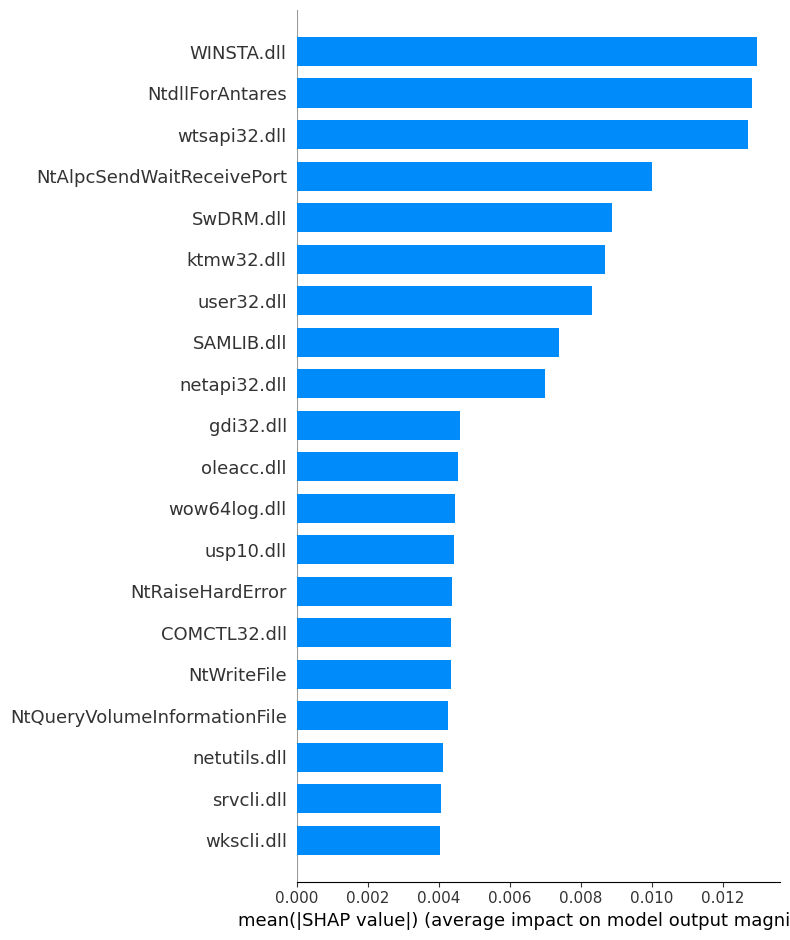

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

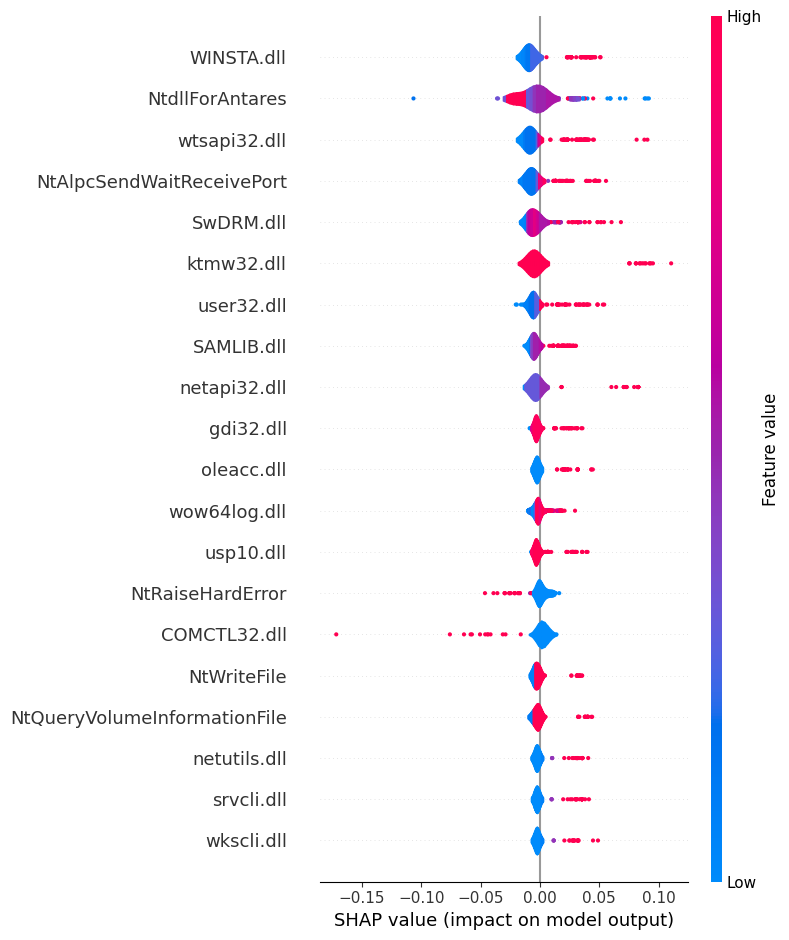

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **Class =6**

In [ ]:
class_index = 6
shap_values_class = shap_values[..., class_index]  # Shape: (20, 6006, 1)

shap_values_class = shap_values_class.squeeze(axis=2)  # Shape: (20, 6006)

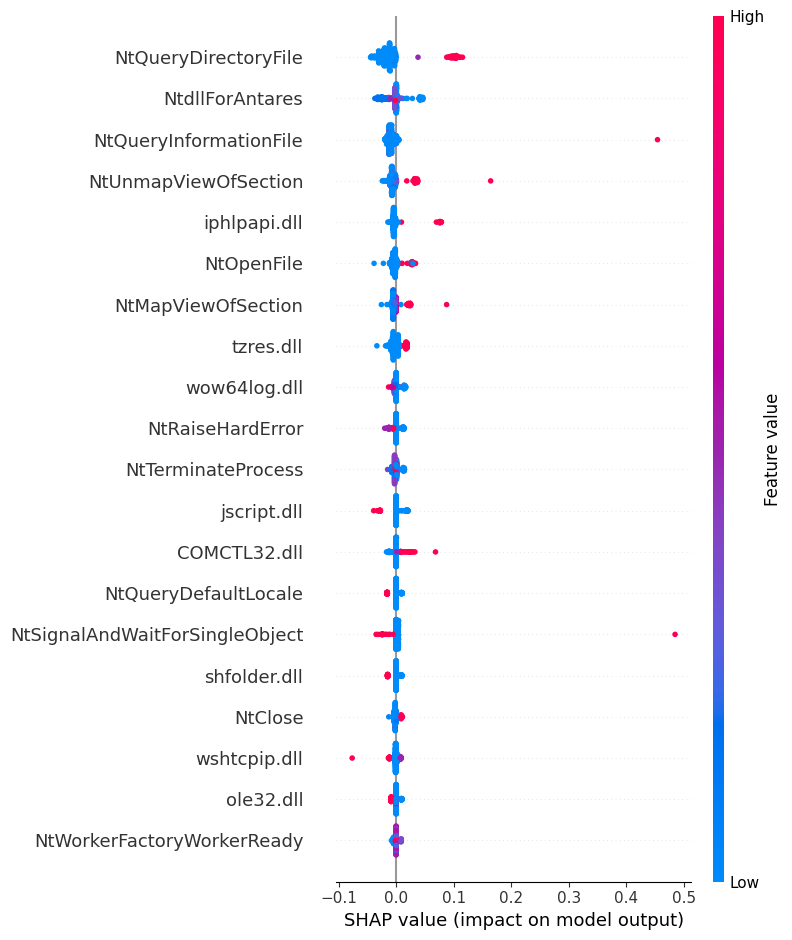

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

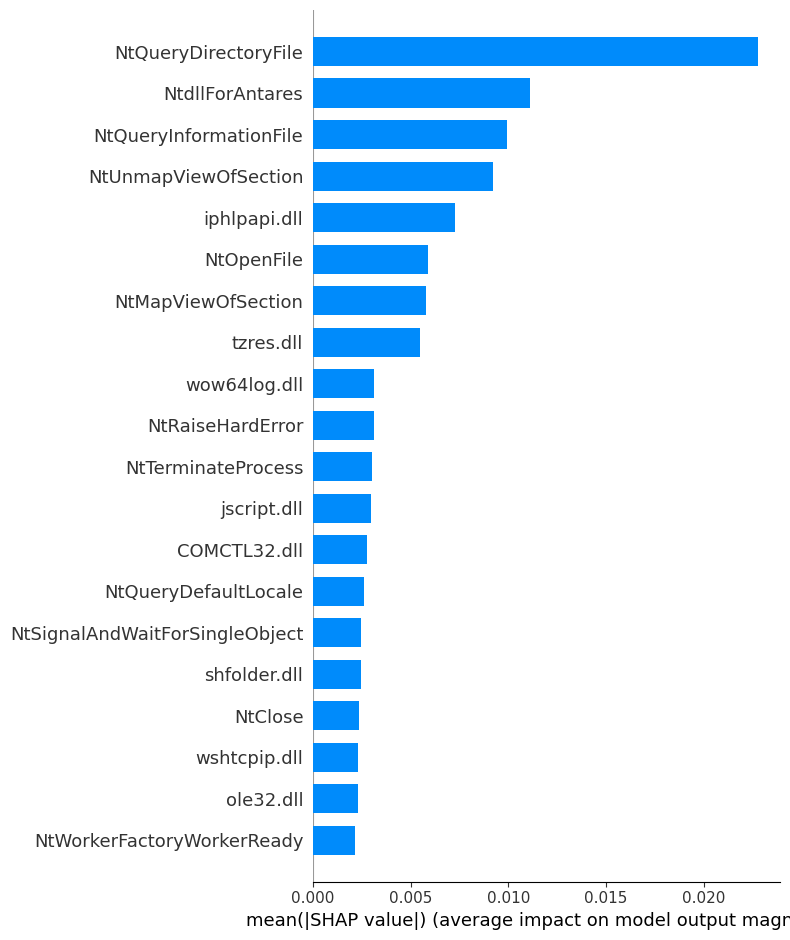

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

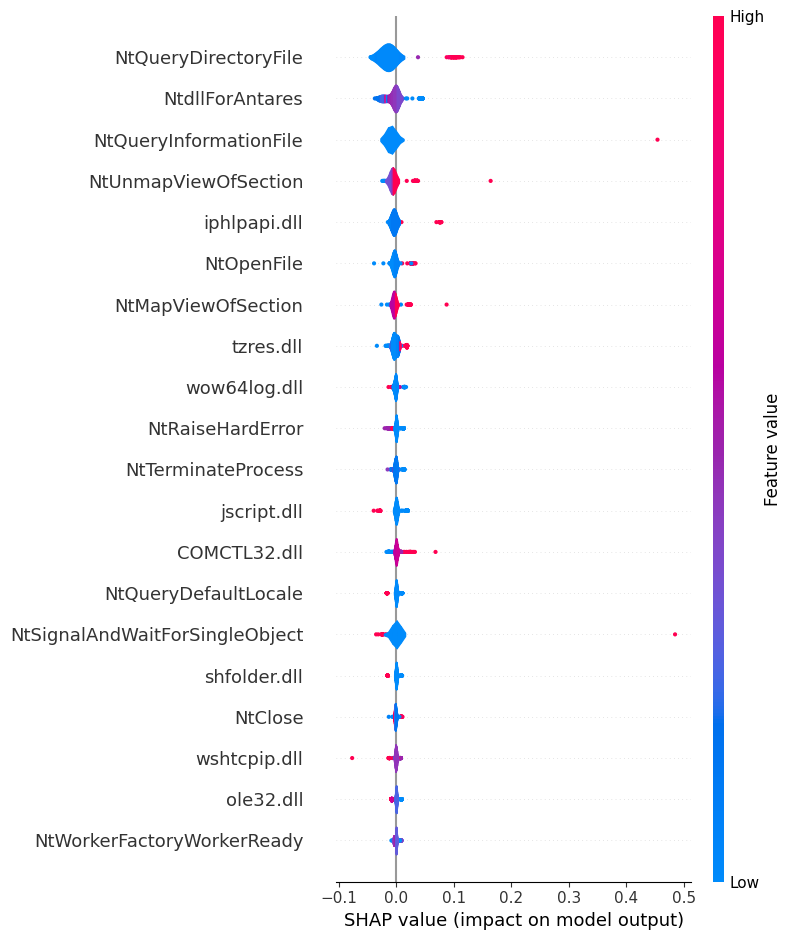

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')


### **Class = 7**

In [ ]:
class_index = 7
shap_values_class = shap_values[..., class_index]

shap_values_class = shap_values_class.squeeze(axis=2)

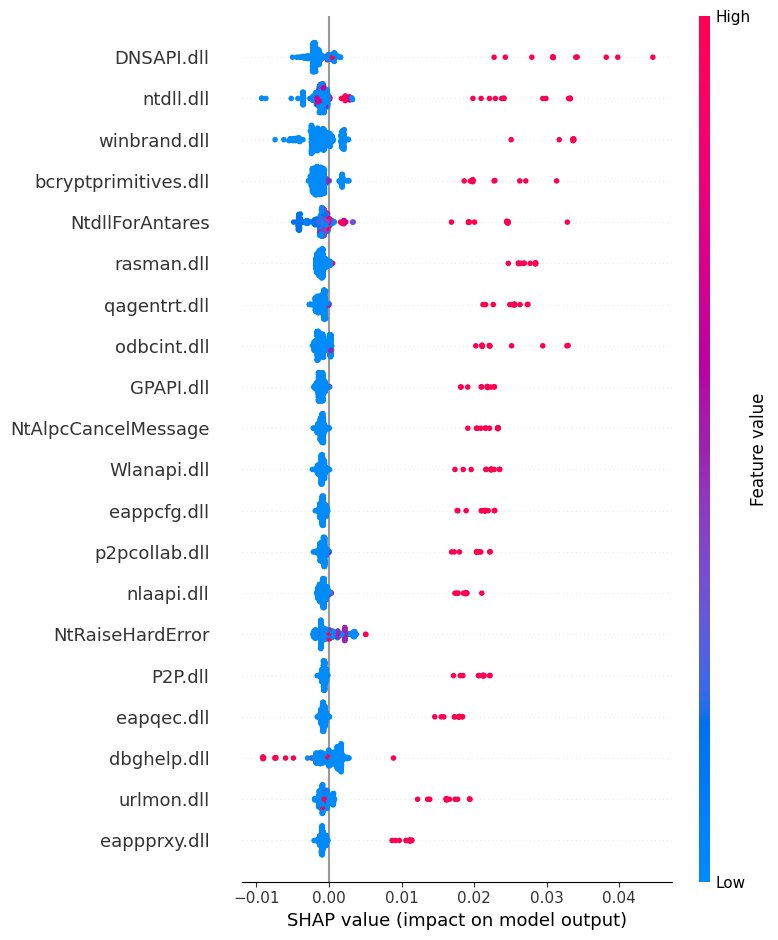

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

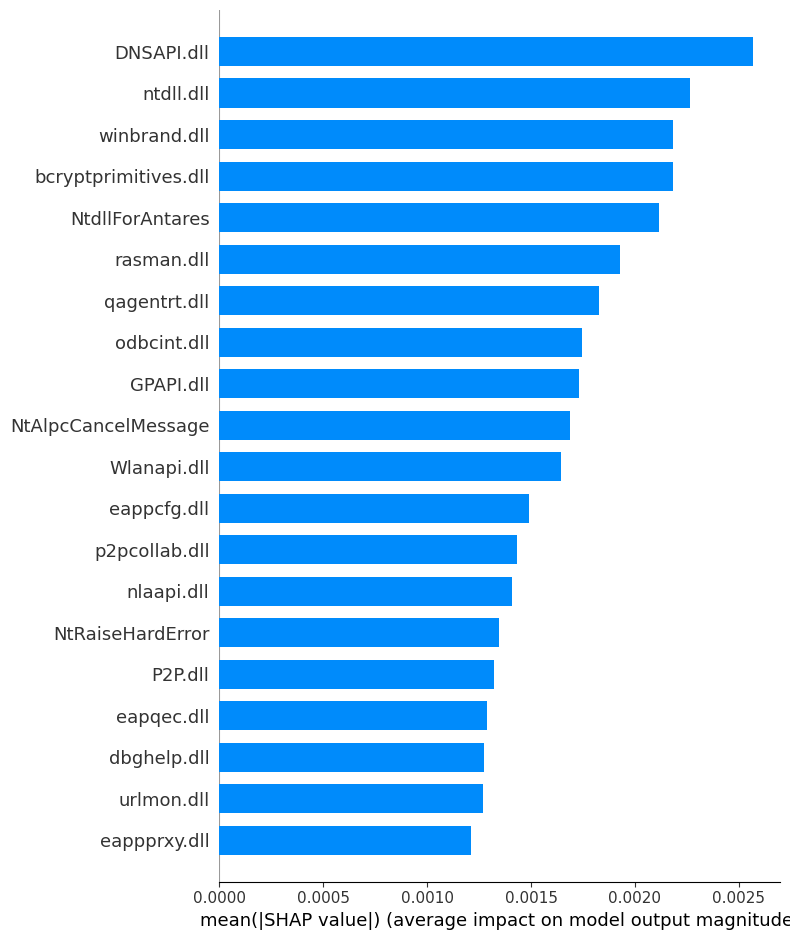

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

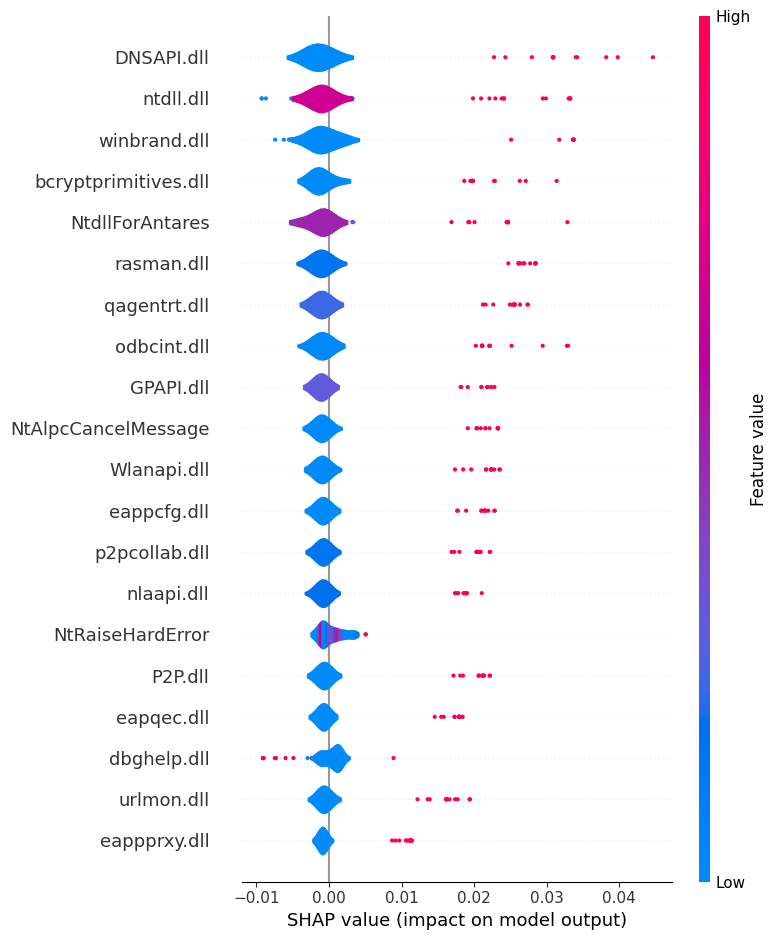

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')

### **Class = 8**

In [ ]:
class_index = 8
shap_values_class = shap_values[..., class_index]

shap_values_class = shap_values_class.squeeze(axis=2)

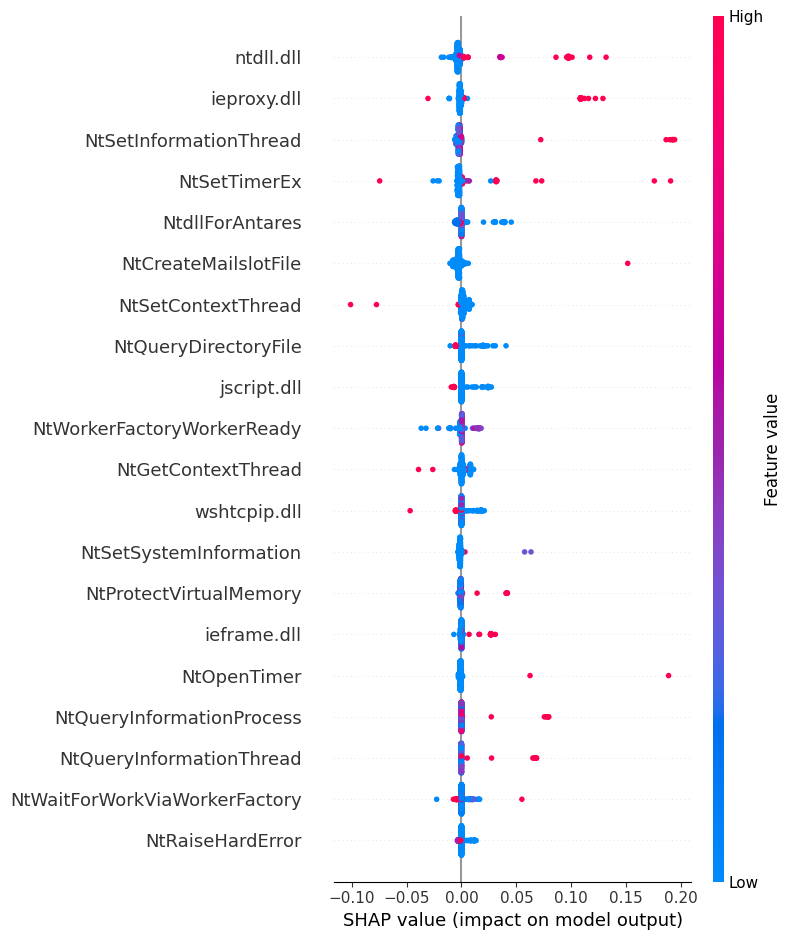

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names)

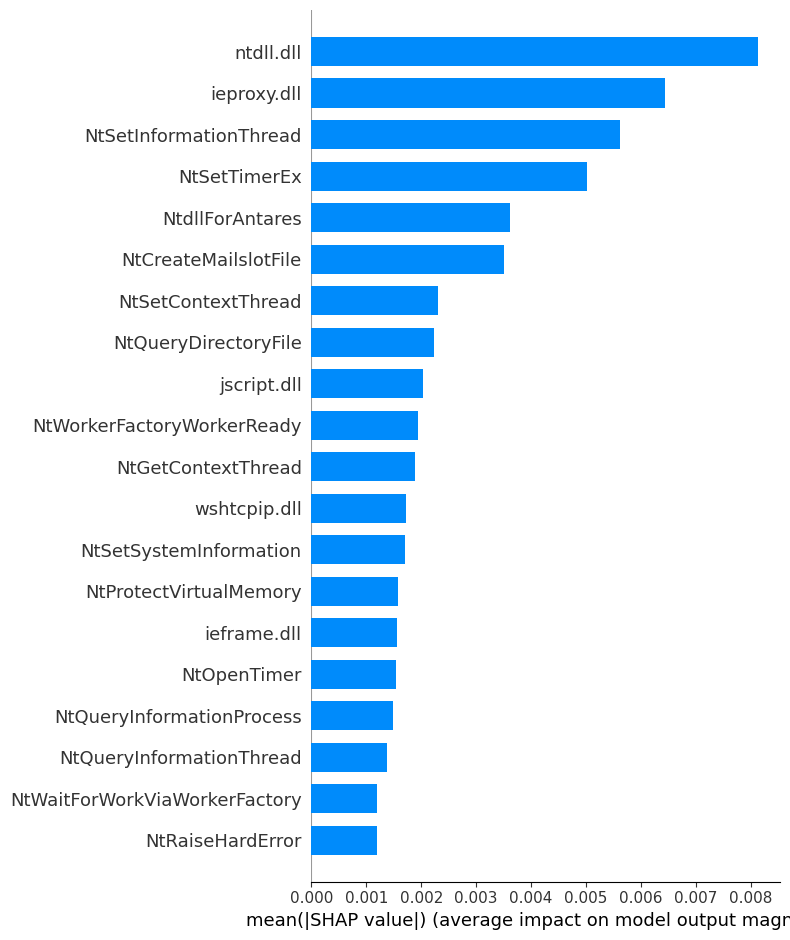

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='bar')

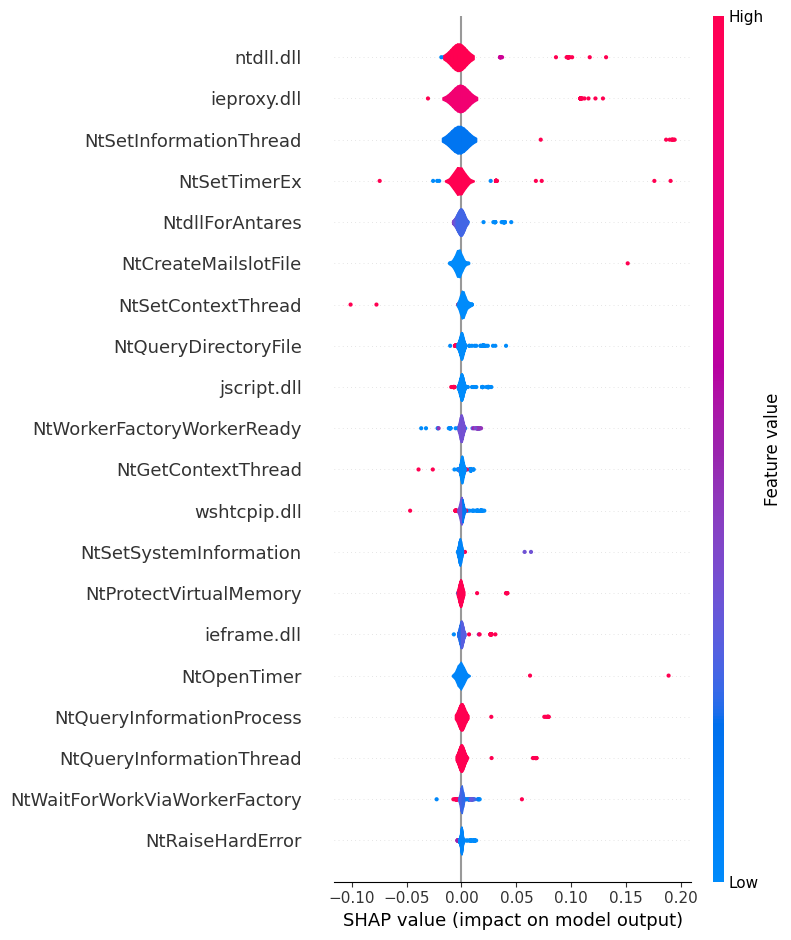

In [ ]:
shap.summary_plot(shap_values_class, sample_test_2d, feature_names=feature_names, plot_type='violin')